# Práctica 5: Método Montecarlo

In [2]:
f <- function(x) { return(1 / (exp(x) + exp(-x))) }
g <- function(x) { return((2 / pi) * f(x)) }
library(distr)
suppressMessages(library(distr))
generador  <- r(AbscontDistribution(d = g)) # creamos un generador

In [27]:
decimalesexactos <- function (x){
    for (i in 1:6){
        if (!(trunc(wolfram*10^i)==trunc(x*10^i))){
            return(i-1)
            break
        } 
    }
    return(6)
}

In [33]:
desde <- 3
hasta <- 7
wolfram=0.048834
cuantos <- 500
parte <- function() {
  valores <- generador(pedazo)
  return(sum(valores >= desde & valores <= hasta))
}
suppressMessages(library(doParallel))
registerDoParallel(makeCluster(detectCores() - 3))
datos=data.frame()
for(pedazo in seq(1000,10000,1000)){ 
  for(i in 1:50){
        montecarlo <- foreach(i = 1:cuantos, .combine=c) %dopar% parte()
        integral <- (pi / 2) *sum(montecarlo) / (cuantos * pedazo)
        datos=rbind(datos,c(pedazo,integral,decimalesexactos(integral)))
  }
}
stopImplicitCluster()

names(datos)=c("Corridas","Integral","Decimales Exactos")

In [468]:
names(datos)=c("Pedazo","Integral","Decimales Exactos")

In [477]:
print(xtable::xtable(datos[c(1,105,210,320,400,700,900),],,digits=c(0,0,7,0)))

% latex table generated in R 4.0.2 by xtable 1.8-4 package
% Tue Oct 20 23:28:30 2020
\begin{table}[ht]
\centering
\begin{tabular}{rrrr}
  \hline
 & Pedazo & Integral & Decimales Exactos \\ 
  \hline
1 & 1000 & 0.0488361 & 5 \\ 
  105 & 3000 & 0.0488884 & 4 \\ 
  210 & 5000 & 0.0488486 & 4 \\ 
  320 & 7000 & 0.0488275 & 4 \\ 
  400 & 8000 & 0.0487473 & 3 \\ 
  700 & 65000 & 0.0489142 & 3 \\ 
  900 & 85000 & 0.0488143 & 4 \\ 
   \hline
\end{tabular}
\end{table}


In [421]:
png(file="boxplot.png",
    width=5500, height=2000, res = 200)
par(mar = c(5,5,5,5))
boxplot(datos[1151:1200,2],datos[1201:1250,2],datos[1101:1150,2],datos[1051:1100,2],datos[1001:1050,2],datos[1:50,2], datos[51:100,2], datos[101:150,2], datos[151:200,2], datos[201:250,2], datos[251:300,2], datos[301:350,2],
        datos[351:400,2], datos[401:450,2], datos[451:500,2],datos[501:550,2], datos[551:600,2], datos[601:650,2], datos[651:700,2], datos[701:750,2],
        datos[751:800,2], datos[801:850,2], datos[851:900,2], datos[901:950,2], col=palette("Pastel 2"), las = 0, 
        names=c(50,75,100,250,500,seq(1000,10000,1000), seq(50000,90000,5000)), xlab="Pedazos", ylab="Valor de la integral", cex.axis=1.6,
        cex.lab=2)
abline(h=wolfram, col = "Red", lty = 5, lwd = 2)
dev.off()

pdf 
  2

In [473]:
cor.test(datos$Pedazo,datos$`Decimales Exactos`)


	Pearson's product-moment correlation

data:  datos$Pedazo and datos$`Decimales Exactos`
t = 23.753, df = 1250, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5182761 0.5946934
sample estimates:
      cor 
0.5576652 


In [424]:
png(file="boxplot2.png",
    width=5700, height=2000, res = 200)
par(mar = c(5,5,5,5))
boxplot(datos[1151:1200,2],datos[1201:1250,2],datos[1101:1150,3],datos[1051:1100,3],datos[1001:1050,3],datos[1:50,3], datos[51:100,3], datos[101:150,3], datos[151:200,3], datos[201:250,3], datos[251:300,3], datos[301:350,3],
        datos[351:400,3], datos[401:450,3], datos[451:500,3], datos[501:550,3], datos[551:600,3], datos[601:650,3], datos[651:700,3], datos[701:750,3],
        datos[751:800,3], datos[801:850,3], datos[851:900,3], datos[901:950,3], datos[951:1000,3], col=palette("Pastel 2"), las = 0, 
        names=c(50,75,100,250,500, seq(1000,10000,1000), seq(50000,95000,5000)), xlab="Pedazos", ylab="Decimales exactos", cex.axis=1.6,
        cex.lab=2)
#abline(h=wolfram, col = "Red", lty = 5, lwd = 2)
dev.off()

pdf 
  2

## Reto 1

In [243]:
decimalesexactos_pi <- function (x){
    for (i in 0:6){
        if (!(trunc(pi*10^i)==trunc(x*10^i))){
            return(i)
            break
        } 
    }
    return(6)
}

In [396]:
in.circle = function (){
    xs <- runif(runs, min = -0.5, max = 0.5)
    ys <- runif(runs, min = -0.5, max = 0.5) 
    in.circle <- xs^2 + ys^2 <= 0.5^2
    w <- (sum(in.circle)/runs)*4
    return(w)
}

In [397]:
pi = 3.141592
rep = 50

suppressMessages(library(doParallel))
registerDoParallel(makeCluster(detectCores() - 2))

datospi1=data.frame()
for(i in 2:8){
    runs <- 10^i
    mc.pi <- foreach(j = 1:rep, .combine=c) %dopar% in.circle()
    for (j in 1:rep){
        datospi <- rbind(datospi, c(i,mc.pi[j], decimalesexactos_pi(mc.pi[j])))
    }
}
stopImplicitCluster()


In [429]:
png(file="reto.png",
    width=5700, height=2000, res = 200)
par(mar = c(5,5,5,5))
boxplot(datospi[1:50,2], datospi[51:100,2], datospi[101:150,2], datospi[151:200,2], datospi[201:250,2], datospi[251:300,2], datospi[301:350,2],
        xlab="Pedazos", ylab="aproximación de pi", cex.axis=1.8, names=c(100,1000,1000,10000,1000000,10000000,100000000),
        cex.lab=2, col=palette("Pastel 2"))
abline(h=pi, col = "Red", lty = 5, lwd = 2)
dev.off()

pdf 
  2

In [427]:
png(file="reto1.png",
    width=5700, height=2000, res = 200)
par(mar = c(5,5,5,5))
boxplot(datospi[1:50,3], datospi[51:100,3], datospi[101:150,3], datospi[151:200,3], datospi[201:250,3], datospi[251:300,3], datospi[301:350,3],
        xlab="Muestra", ylab="aproximación de pi", cex.axis=1.8, names=c(100,1000,1000,10000,1000000,10000000,100000000),
        cex.lab=2, col=palette("Pastel 2"))
#abline(h=pi, col = "Red", lty = 5, lwd = 2)
dev.off()

pdf 
  2

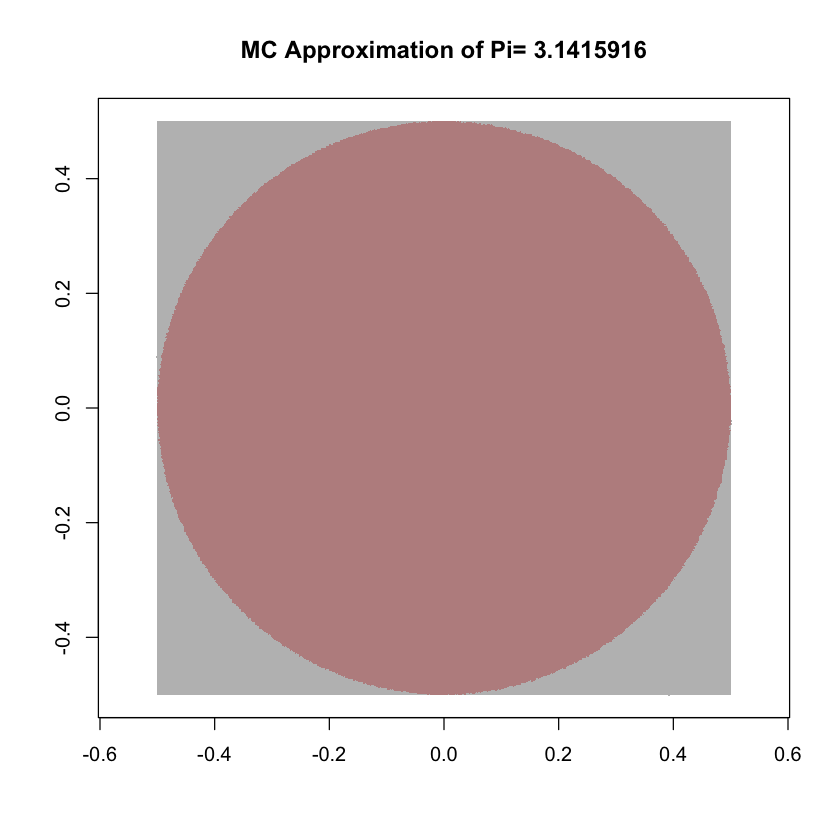

In [200]:
plot(xs,ys,pch='.', col=ifelse(in.circle, "rosybrown", "grey"),
    xlab='', ylab='', asp=1,
    main=paste("MC Approximation of Pi=", mc.pi))